## Linear regression with interaction effects

Estimating a linear regression model with annual income in USD (**earn**) as the response variable. Investigating whether the relationship between income **earn** and level of education **education** differs depending on gender **male** or not.

### Data Understanding

Y (response variable) = **earn** (income in USD)

X1 = **education** (level of education, number of years)

X2 = **male** (gender, male or female)

X3 = Interaction term between **education** and **male** (education × male)

Dataset Source: [https://github.com/avehtari/ROS-Examples/blob/master/Earnings/data/earnings.csv]

In [42]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
dataset_orig = pd.read_csv("Datasets/earnings.csv")

In [5]:
dataset_orig.head()

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91


**earn** - the person's annual income in USD. Retrieved from registry.

**height** - height of the person in inches. Self-reported.

**weight** - weight of the person in pounds. Self-reported.

**male** - dummy variable with values ​​1 (male) and 0 (female). Retrieved from registry.

**ethnicity** - the person's ethnicity, with Black, Hispanic, Other, and White categories. Retrieved from registry.

**education** - number of years of education. Retrieved from registry.

**age** - age. Retrieved from registry

In [6]:
dataset = dataset_orig[['earn', 'height', 'weight', 'male', 'ethnicity', 'education', 'age']]

In [7]:
dataset.head()

,earn,height,weight,male,ethnicity,education,age
0,50000.0,74,210.0,1,White,16.0,45
1,60000.0,66,125.0,0,White,16.0,58
2,30000.0,64,126.0,0,White,16.0,29
3,25000.0,65,200.0,0,White,17.0,57
4,50000.0,63,110.0,0,Other,16.0,91


In [41]:
dataset.describe()

,earn,height,weight,male,education,age
count,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000
mean,23657.003115,66.821184,157.373209,0.410592,13.333956,43.161371
std,22671.288087,3.873119,34.449133,0.492095,2.572999,17.355194
min,200.000000,57.000000,80.000000,0.000000,2.000000,18.000000
25%,10000.000000,64.000000,130.000000,0.000000,12.000000,30.000000
50%,19000.000000,66.000000,150.000000,0.000000,13.000000,39.000000
75%,30000.000000,70.000000,180.000000,1.000000,16.000000,56.000000
max,400000.000000,82.000000,342.000000,1.000000,18.000000,91.000000


In [9]:
dataset.shape

(1816, 7)

### Descriptive Analysis
#### Checking Missing Values

In [ ]:
dataset.isna().sum()

earn          0
height        0
weight       27
male          0
ethnicity     0
education     2
age           0
dtype: int64

In [12]:
dataset = dataset.dropna()

In [13]:
dataset.isna().sum()

earn         0
height       0
weight       0
male         0
ethnicity    0
education    0
age          0
dtype: int64

In [38]:
dataset = dataset[dataset['earn'] > 0.0]

In [39]:
dataset.shape

(1605, 7)

#### EARN

In [40]:
dataset['earn'].describe()

count      1605.000000
mean      23657.003115
std       22671.288087
min         200.000000
25%       10000.000000
50%       19000.000000
75%       30000.000000
max      400000.000000
Name: earn, dtype: float64

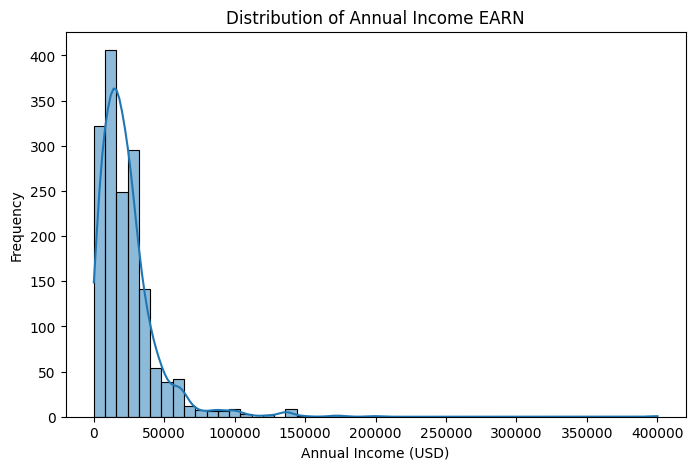

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(data=dataset['earn'], bins=50, kde=True)
plt.title("Distribution of Annual Income EARN")
plt.xlabel('Annual Income (USD)')
plt.ylabel('Frequency')
plt.show()

> It is very right skewed! There seems to be many outliers or incomes that are unusual.

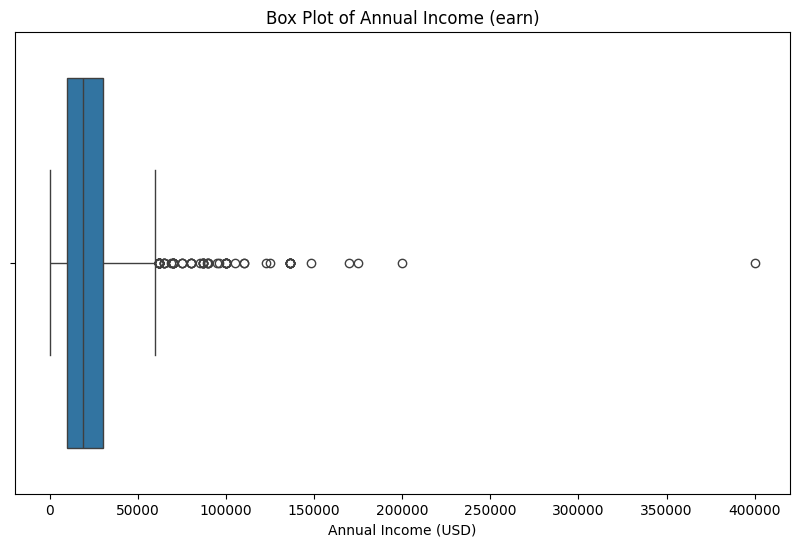

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['earn'])
plt.title('Box Plot of Annual Income (earn)')
plt.xlabel('Annual Income (USD)')
plt.show()

Outliers start around 60 or 70000 USD, It would be better to remove the outliers here!  
> Let's remove the outliers of EARN!

In [49]:
Q1 = dataset['earn'].quantile(0.25)
Q3 = dataset['earn'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dataset = dataset[(dataset['earn'] >= lower_bound) & (dataset['earn'] <= upper_bound)]

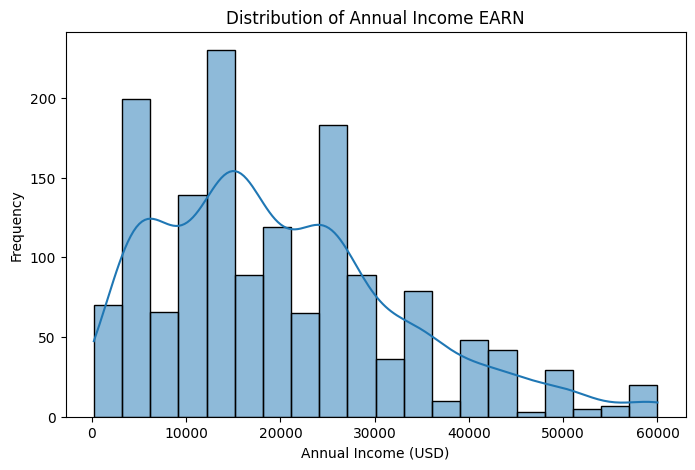

In [54]:
plt.figure(figsize=(8,5))
sns.histplot(data=dataset['earn'], bins=20, kde=True)
plt.title("Distribution of Annual Income EARN")
plt.xlabel('Annual Income (USD)')
plt.ylabel('Frequency')
plt.show()

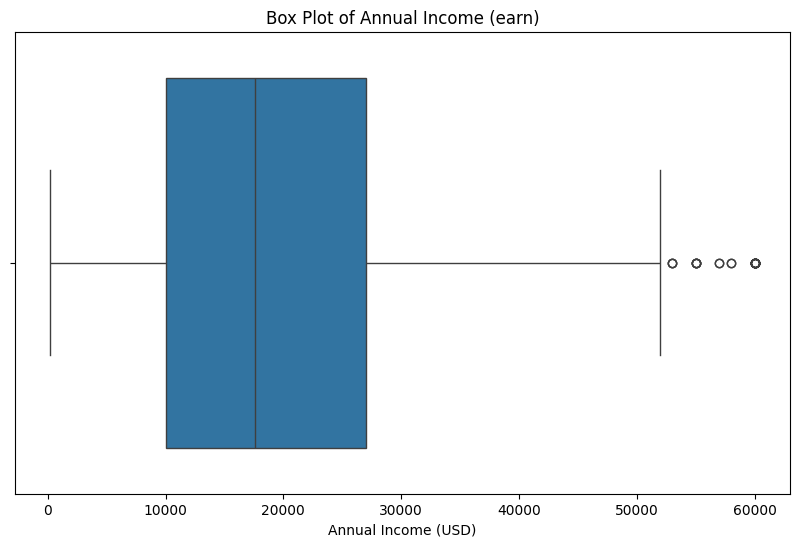

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['earn'])
plt.title('Box Plot of Annual Income (earn)')
plt.xlabel('Annual Income (USD)')
plt.show()

#### HEIGHT